In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [100]:
def findContours(image, kernel_size=3, space_between_contours=1):
    points = []

    rows, cols = image.shape

    padding = (kernel_size - 1) // 2

    for row in range(padding, rows - padding):
        for col in range(padding, cols - padding):
            if image[row][col] == 255:
                small = image[
                        row - padding: row + padding + 1,
                        col - padding: col + padding + 1
                        ]
                if any(small[0] != 255):
                    points.append([col, row])
                elif any(small[2] != 255):
                    points.append([col, row])
                elif any(small[:][0] != 255):
                    points.append([col, row])
                elif any(small[:][2] != 255):
                    points.append([col, row])
                    
    contours = [[points[0]]]
    
    for idx, point in enumerate(points[1:]):
        idx += 1
        previous_point = points[idx - 1]
        
        if abs(previous_point[0] - point[0]) <= space_between_contours:
            contours[-1].append(point)
        elif abs(previous_point[1] - point[1]) <= space_between_contours:
            contours[-1].append(point)
        else:
            contours.append([])
        
    return contours

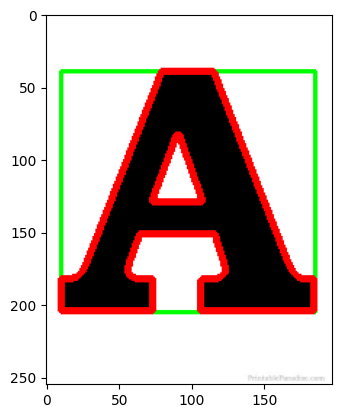

In [105]:
image = cv.imread('img.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

_, gray = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
gray = 255 - gray

contours = findContours(gray)

for contour in contours:
    x, y, w, h = cv.boundingRect(np.array(contour))
    cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    for point in contour:
        cv.circle(image, point, 2, (255, 0, 0), -1)

plt.imshow(image, cmap='hot')
plt.show()